### Upload Kaggle API Key

1. Go to https://www.kaggle.com/account
2. Scroll down to the API section.
3. Click "Create New API Token".
4. A file called `kaggle.json` will be downloaded.

In [7]:
!pip install google.colab

ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab

[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install -q kaggle

La sintaxis del comando no es correcta.
"cp" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"chmod" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Download dataset

In [4]:
!kaggle datasets download -d hgultekin/bbcnewsarchive
!unzip bbcnewsarchive.zip -d ./

# Analyze the dataset

### Read csv

In [9]:
import pandas as pd

df = pd.read_csv('bbc-news-data.csv', sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


,category,filename,title,content
count,2225,2225,2225,2225
unique,5,511,2096,2092
top,sport,385.txt,Troubled Marsh under SEC scrutiny,"Conductor Marcello Viotti, director of Venice..."
freq,511,5,2,2


### Check category distribution to see if the dataset is balanced

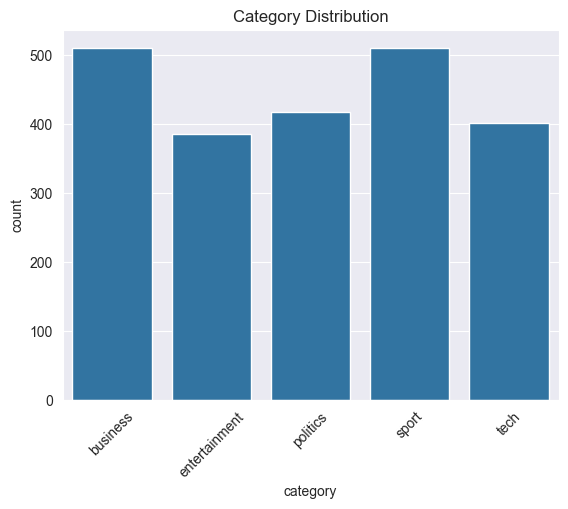

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='category')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

### Check if the dataset contain any null or empty value

In [12]:
print(df.isnull().sum())

category    0
filename    0
title       0
content     0
dtype: int64


### Analyze the articles length

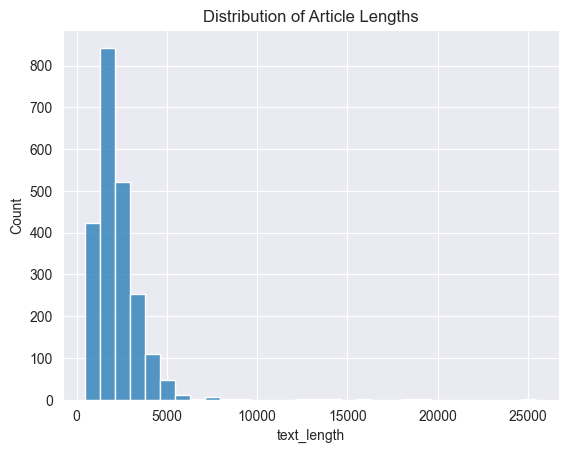

In [13]:
df['text_length'] = df['content'].apply(len)

sns.histplot(df['text_length'], bins=30)
plt.title('Distribution of Article Lengths')
plt.show()

### Analyze articles to see patterns on the categories

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


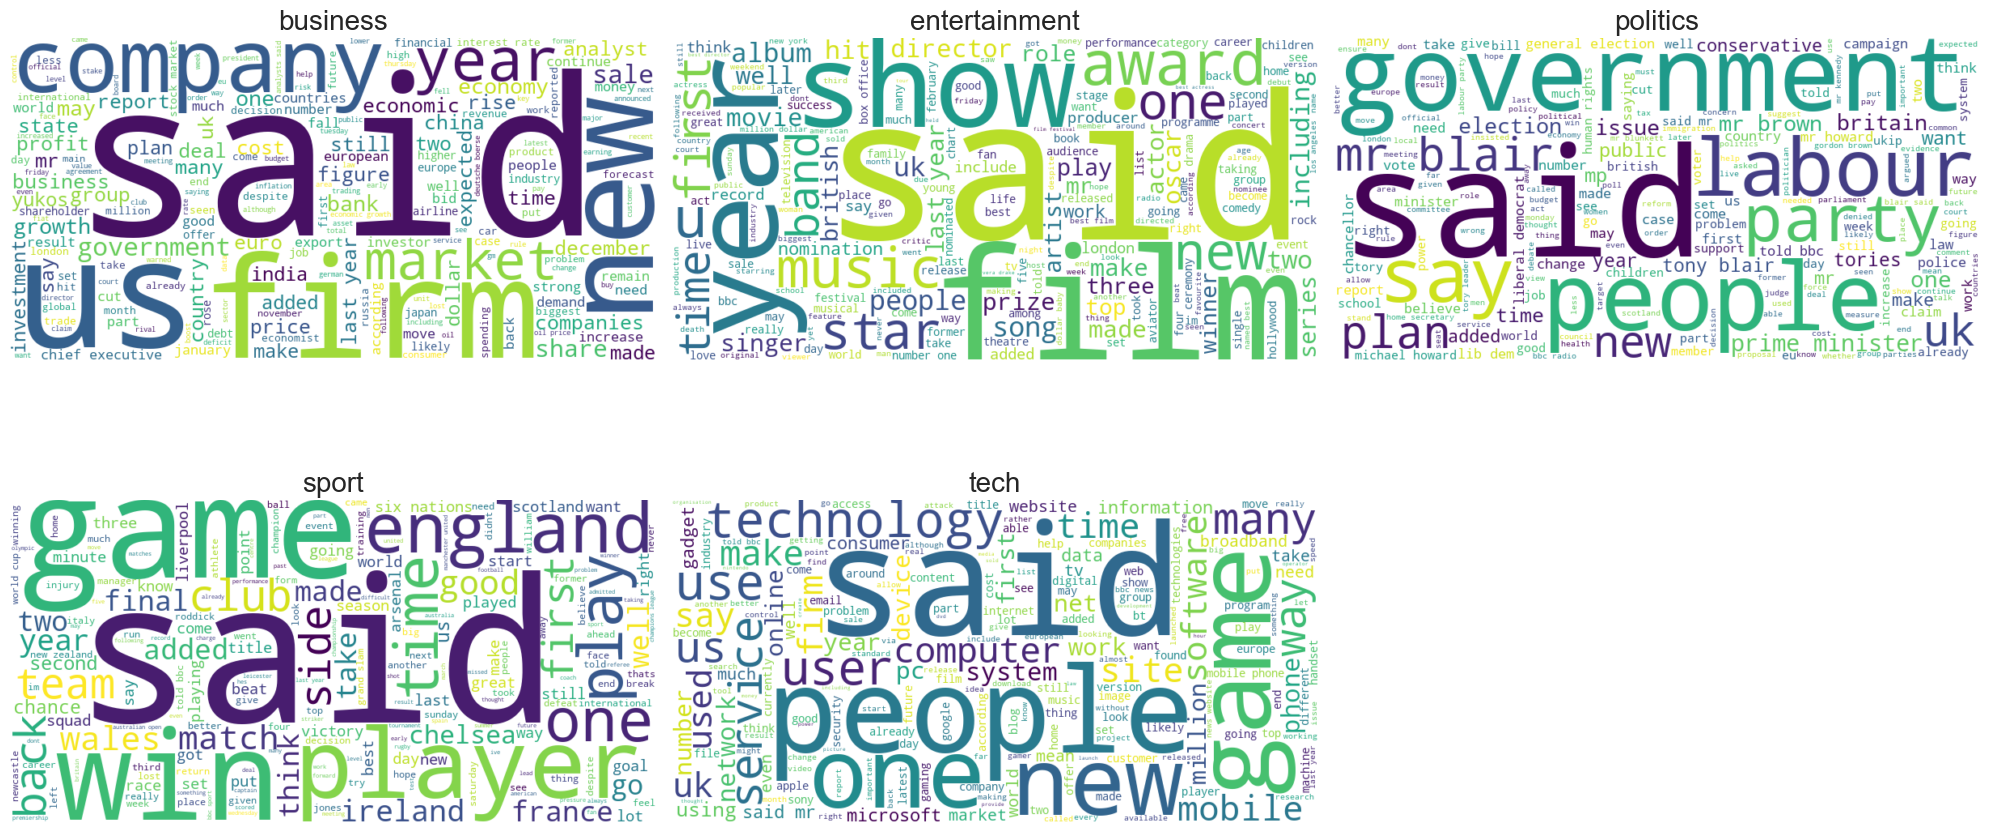

In [14]:
from wordcloud import WordCloud
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['content'].apply(clean_text)


categories = df['category'].unique()

plt.figure(figsize=(20, 10))

for i, category in enumerate(categories):
    text = ' '.join(df[df['category'] == category]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.subplot(2, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{category}', fontsize=20)

plt.tight_layout()
plt.show()

###  Might be useful to analyze the titles as well

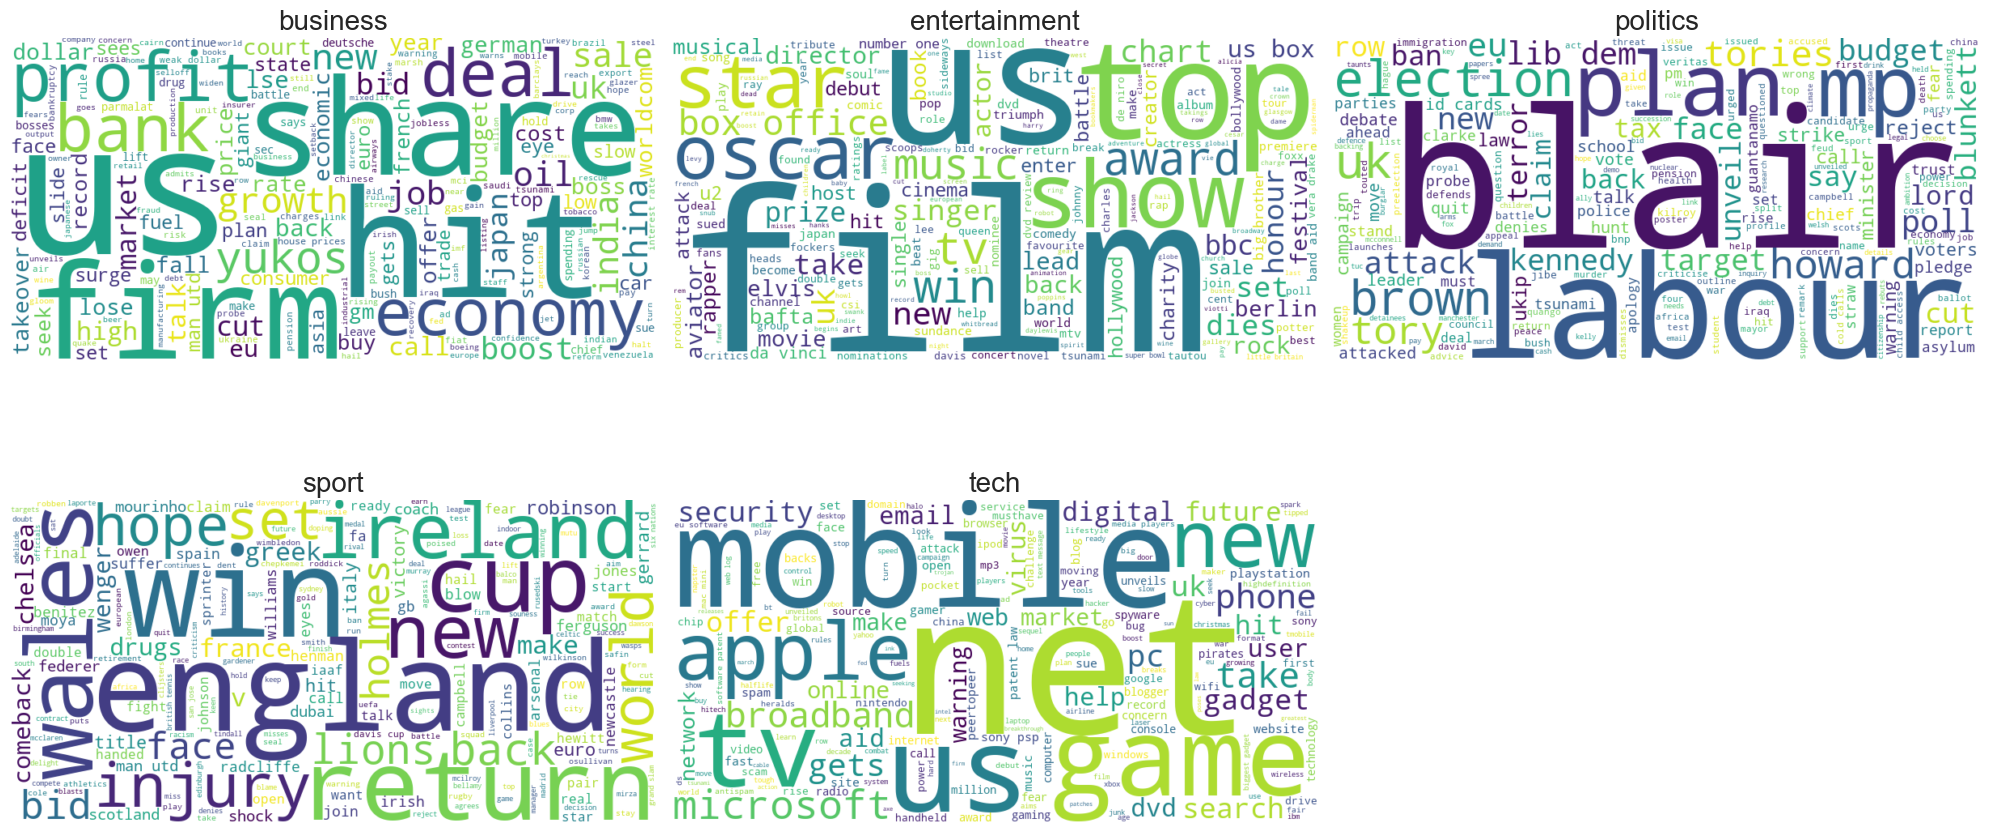

In [15]:
df['clean_title'] = df['title'].apply(clean_text)

categories = df['category'].unique()

plt.figure(figsize=(20, 10))

for i, category in enumerate(categories):
    text = ' '.join(df[df['category'] == category]['clean_title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.subplot(2, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{category}', fontsize=20)

plt.tight_layout()
plt.show()

# Dataset after sanitization

In [16]:
df

,category,filename,title,content,text_length,clean_text,clean_title
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,2525,quarterly profits us media giant timewarner ju...,ad sales boost time warner profit
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,2219,dollar hit highest level euro almost three mon...,dollar gains greenspan speech
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1517,owners embattled russian oil giant yukos ask b...,yukos unit buyer faces loan claim
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,2367,british airways blamed high fuel prices 40 dro...,high fuel prices hit bas profits
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1535,shares uk drinks food firm allied domecq risen...,pernod takeover talk lifts domecq
...,...,...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,2485,bt introducing two initiatives help beat rogue...,bt program beat dialler scams
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,2253,computer users across world continue ignore se...,spam emails tempt net shoppers
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,6258,new european directive could put software writ...,careful code
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,2283,man making sure us computer networks safe secu...,us cyber security chief resigns


# Stemming of texts

In [17]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df['stemmed_text'] = df['clean_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df['stemmed_title'] = df['clean_title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df

,category,filename,title,content,text_length,clean_text,clean_title,stemmed_text,stemmed_title
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,2525,quarterly profits us media giant timewarner ju...,ad sales boost time warner profit,quarterli profit us media giant timewarn jump ...,ad sale boost time warner profit
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,2219,dollar hit highest level euro almost three mon...,dollar gains greenspan speech,dollar hit highest level euro almost three mon...,dollar gain greenspan speech
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1517,owners embattled russian oil giant yukos ask b...,yukos unit buyer faces loan claim,owner embattl russian oil giant yuko ask buyer...,yuko unit buyer face loan claim
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,2367,british airways blamed high fuel prices 40 dro...,high fuel prices hit bas profits,british airway blame high fuel price 40 drop p...,high fuel price hit ba profit
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1535,shares uk drinks food firm allied domecq risen...,pernod takeover talk lifts domecq,share uk drink food firm alli domecq risen spe...,pernod takeov talk lift domecq
...,...,...,...,...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,2485,bt introducing two initiatives help beat rogue...,bt program beat dialler scams,bt introduc two initi help beat rogu dialler s...,bt program beat dialler scam
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,2253,computer users across world continue ignore se...,spam emails tempt net shoppers,comput user across world continu ignor secur w...,spam email tempt net shopper
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,6258,new european directive could put software writ...,careful code,new european direct could put softwar writer r...,care code
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,2283,man making sure us computer networks safe secu...,us cyber security chief resigns,man make sure us comput network safe secur res...,us cyber secur chief resign


# Embedding of texts with TF-IDF

Concat stemmed text and title.

In [18]:
df["concat_title_text"] = df["stemmed_title"] + " " + df["stemmed_text"]
df["concat_title_text_length"] = df["concat_title_text"].apply(len)

df

,category,filename,title,content,text_length,clean_text,clean_title,stemmed_text,stemmed_title,concat_title_text,concat_title_text_length
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,2525,quarterly profits us media giant timewarner ju...,ad sales boost time warner profit,quarterli profit us media giant timewarn jump ...,ad sale boost time warner profit,ad sale boost time warner profit quarterli pro...,1633
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,2219,dollar hit highest level euro almost three mon...,dollar gains greenspan speech,dollar hit highest level euro almost three mon...,dollar gain greenspan speech,dollar gain greenspan speech dollar hit highes...,1460
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1517,owners embattled russian oil giant yukos ask b...,yukos unit buyer faces loan claim,owner embattl russian oil giant yuko ask buyer...,yuko unit buyer face loan claim,yuko unit buyer face loan claim owner embattl ...,1005
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,2367,british airways blamed high fuel prices 40 dro...,high fuel prices hit bas profits,british airway blame high fuel price 40 drop p...,high fuel price hit ba profit,high fuel price hit ba profit british airway b...,1615
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1535,shares uk drinks food firm allied domecq risen...,pernod takeover talk lifts domecq,share uk drink food firm alli domecq risen spe...,pernod takeov talk lift domecq,pernod takeov talk lift domecq share uk drink ...,1040
...,...,...,...,...,...,...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,2485,bt introducing two initiatives help beat rogue...,bt program beat dialler scams,bt introduc two initi help beat rogu dialler s...,bt program beat dialler scam,bt program beat dialler scam bt introduc two i...,1531
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,2253,computer users across world continue ignore se...,spam emails tempt net shoppers,comput user across world continu ignor secur w...,spam email tempt net shopper,spam email tempt net shopper comput user acros...,1378
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,6258,new european directive could put software writ...,careful code,new european direct could put softwar writer r...,care code,care code new european direct could put softwa...,3544
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,2283,man making sure us computer networks safe secu...,us cyber security chief resigns,man make sure us comput network safe secur res...,us cyber secur chief resign,us cyber secur chief resign man make sure us c...,1402


Collect the unique words across all samples to make a vector which coefficients can be mapped to one word.

In [19]:
set_of_words = set()

for text in df["concat_title_text"]:
    set_of_words.update(text.split())

print(set_of_words)
len(set_of_words)

{'189', '1701', 'cosla', 'novosel', '2722', 'quizz', 'kemadj', 'invent', 'joan', 'brownbeck', '51075', 'bernard', 'slavishli', 'nonsolicit', 'weaver', 'remortgag', 'bandwagon', 'far', 'behalf', 'decapit', 'mulligan', 'nicknam', 'ukrain', 'freeli', '133', 'junk', '449', 'perchesk', 'youngestev', 'enjoy', 'nowdefunct', 'nadia', 'inspir', 'n64', 'prioriti', '£83m', 'edinburgh', 'namesak', 'reform', 'tradedriven', 'burrel', 'underpr', 'establish', 'indescrib', 'fouryearold', 'valley', 'waggon', 'margin', 'lip', 'lt', 'inpati', '40gb', 'peac', 'ronaldino', '£134m', 'mugger', 'knighthood', 'spot', 'rush', 'protest', 'augment', 'nirvana', 'diversifi', 'bind', 'qrio', 'onematch', 'zhang', 'euphor', 'conquer', '1967', 'upperbodi', 'transistor', 'resurrect', 'v603sh', 'mediumtolong', 'w', 'bestpictur', 'zoom', 'getaway', 'jock', 'masi', 'township', 'remonstr', 'h', 'metaphor', 'undertook', 'remain', '2006', 'telenor', 'product', 'sizeabl', 'nigerianown', 'rematch', 'egwin', 'torchhmmmmm', 'refoc

24483

Create dictionary that will represent the embedding vector structure.

### TF

In [20]:
# Cálculo de TF
from collections import Counter

def term_frequency_calculator(concat_title_text, set_of_words):
    vector_of_words = dict()
    words_in_doc = concat_title_text.split()
    total_words_in_doc = len(words_in_doc)
    word_counter = Counter(words_in_doc)

    for word in set_of_words:
        word_count = word_counter[word]
        vector_of_words[word] = word_count / total_words_in_doc

    return vector_of_words

### IDF

In [21]:
# Cálculo de IDF
import math

def inverse_document_frequency_calculator(df, set_of_words):
    number_of_docs = len(df)
    idf_dict = dict()

    for word in set_of_words:
        number_of_docs_with_word = sum([1 for stemmed_text in df["concat_title_text"] if word in stemmed_text])
        idf_dict[word] = 0 if number_of_docs_with_word == 0 else math.log(number_of_docs / number_of_docs_with_word)

    return idf_dict

### TF-IDF

In [22]:
# Calcular TF
tf_dicts = df["concat_title_text"].apply(lambda text: term_frequency_calculator(text, set_of_words))

# Calcular IDF
idf_dict = inverse_document_frequency_calculator(df, set_of_words)

# Multiplicar TF por IDF y agregar al DataFrame
tf_idf_dict_list = tf_dicts.apply(lambda tf_dict: {word: tf_dict[word] * idf_dict[word] for word in tf_dict})

tf_idf_dict_list

0       {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
1       {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
2       {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
3       {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
4       {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
                              ...                        
2220    {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
2221    {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
2222    {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
2223    {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
2224    {'189': 0.0, '1701': 0.0, 'cosla': 0.0, 'novos...
Name: concat_title_text, Length: 2225, dtype: object

In [23]:
# Aplanar los diccionarios en una lista de pares (palabra, coeficiente)
tf_idf_values = [(word, value) for entry in tf_idf_dict_list for word, value in entry.items()]

# Ordenar por los coeficientes (de mayor a menor y de menor a mayor)
sorted_tf_idf = sorted(tf_idf_values, key=lambda x: x[1], reverse=True)

# Obtener los 5 valores más altos
top_5_coefficients = sorted_tf_idf[:5]

# Mostrar los resultados
print("Top 5 coeficientes más altos:")
print(top_5_coefficients)

Top 5 coeficientes más altos:
[('godzilla', 0.5631971909083529), ('diageo', 0.5555932684388432), ('metlif', 0.536174761363502), ('rossignol', 0.5089866543603998), ('pountney', 0.5070625311354502)]


### Deletion of irrelevant coefficients.

We eliminate the words which value is near 0 on 90% of the documents.

In [24]:
# Filtrar palabras con coeficientes cercanos a 0 en el 90% de los documentos
def filter_low_tf_idf_words(embedded_concat_text, threshold=0.9, near_zero=1e-6):
    # Contar en cuántos documentos cada palabra tiene un coeficiente cercano a 0
    word_zero_count = {word: 0 for word in embedded_concat_text.iloc[0].keys()}

    for doc in embedded_concat_text:
        for word, value in doc.items():
            if abs(value) < near_zero:
                word_zero_count[word] += 1

    # Calcular el porcentaje de documentos con coeficientes cercanos a 0
    num_docs = len(embedded_concat_text)
    words_to_remove = {word for word, count in word_zero_count.items() if count / num_docs >= threshold}

    # Crear una nueva lista de embeddings filtrados
    filtered_embeddings = embedded_concat_text.apply(
        lambda doc: {word: value for word, value in doc.items() if word not in words_to_remove}
    )
    return filtered_embeddings

# Aplicar la función y crear una nueva lista de embeddings filtrados
filtered_embeddings = filter_low_tf_idf_words(tf_idf_dict_list)

filtered_embeddings

0       {'far': 0.0, 'remain': 0.0, 'product': 0.0, 't...
1       {'far': 0.0, 'remain': 0.025103385052674444, '...
2       {'far': 0.0, 'remain': 0.0, 'product': 0.02537...
3       {'far': 0.0, 'remain': 0.007294191128512951, '...
4       {'far': 0.0, 'remain': 0.0, 'product': 0.0, 't...
                              ...                        
2220    {'far': 0.0, 'remain': 0.0, 'product': 0.0, 't...
2221    {'far': 0.0, 'remain': 0.0, 'product': 0.00933...
2222    {'far': 0.0, 'remain': 0.0, 'product': 0.00373...
2223    {'far': 0.0, 'remain': 0.0, 'product': 0.0, 't...
2224    {'far': 0.005888181774569874, 'remain': 0.0, '...
Name: concat_title_text, Length: 2225, dtype: object

In [25]:
import pandas as pd

def compare_embedding_sizes(df):
    # Crear un nuevo DataFrame con las columnas calculadas
    new_df = pd.DataFrame()
    new_df["embedded_size"] = tf_idf_dict_list.apply(len)
    new_df["filtered_size"] = filtered_embeddings.apply(len)
    new_df["embedding_difference"] = new_df["embedded_size"] - new_df["filtered_size"]
    return new_df

# Aplicar la función y guardar el resultado en una nueva matriz
result_matrix = compare_embedding_sizes(df)

# Mostrar las primeras filas para verificar
result_matrix.head()

,embedded_size,filtered_size,embedding_difference
0,24483,267,24216
1,24483,267,24216
2,24483,267,24216
3,24483,267,24216
4,24483,267,24216


## FINAL EMBEDDING

In [26]:
# Expandir los embeddings en 267 columnas
filtered_words = list(filtered_embeddings.iloc[0].keys())  # Obtener las palabras filtradas
for word in filtered_words:
    df[word] = filtered_embeddings.apply(lambda x: x.get(word, 0))

# Verificar las primeras filas
df.head()

C:\Users\nacho\AppData\Local\Temp\ipykernel_3828\2679655598.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[word] = filtered_embeddings.apply(lambda x: x.get(word, 0))
C:\Users\nacho\AppData\Local\Temp\ipykernel_3828\2679655598.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[word] = filtered_embeddings.apply(lambda x: x.get(word, 0))
C:\Users\nacho\AppData\Local\Temp\ipykernel_3828\2679655598.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

,category,filename,title,content,text_length,clean_text,clean_title,stemmed_text,stemmed_title,concat_title_text,...,open,reach,posit,charg,peopl,big,talk,call,technolog,possibl
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,2525,quarterly profits us media giant timewarner ju...,ad sales boost time warner profit,quarterli profit us media giant timewarn jump ...,ad sale boost time warner profit,ad sale boost time warner profit quarterli pro...,...,0.000000,0.000000,0.00000,0.008847,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,2219,dollar hit highest level euro almost three mon...,dollar gains greenspan speech,dollar hit highest level euro almost three mon...,dollar gain greenspan speech,dollar gain greenspan speech dollar hit highes...,...,0.007106,0.008866,0.00000,0.000000,0.0,0.005995,0.000000,0.006786,0.0,0.0
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1517,owners embattled russian oil giant yukos ask b...,yukos unit buyer faces loan claim,owner embattl russian oil giant yuko ask buyer...,yuko unit buyer face loan claim,yuko unit buyer face loan claim owner embattl ...,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,2367,british airways blamed high fuel prices 40 dro...,high fuel prices hit bas profits,british airway blame high fuel price 40 drop p...,high fuel price hit ba profit,high fuel price hit ba profit british airway b...,...,0.000000,0.000000,0.00677,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1535,shares uk drinks food firm allied domecq risen...,pernod takeover talk lifts domecq,share uk drink food firm alli domecq risen spe...,pernod takeov talk lift domecq,pernod takeov talk lift domecq share uk drink ...,...,0.000000,0.000000,0.00000,0.000000,0.0,0.008244,0.012621,0.000000,0.0,0.0


# Training of models

## Supervised learning (Decisions Tree)

### Import SKLearn and XGBoost libraries

In [27]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

### Label encoding

In [28]:
encoded_categories = {category: index for index, category in enumerate(df['category'].unique())}
y = df["category"].map(encoded_categories)

y

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Name: category, Length: 2225, dtype: int64

### Division in training, validating and testing data sets

In [31]:
X = df.drop(['category', 'filename', 'content', 'title', 'concat_title_text', 'concat_title_text_length', 'text_length', 'clean_text', 'clean_title', 'stemmed_text', 'stemmed_title', 'concat_title_text', 'concat_title_text_length'], axis=1)

X

,far,remain,product,tri,later,success,mark,perform,show,still,...,open,reach,posit,charg,peopl,big,talk,call,technolog,possibl
0,0.000000,0.000000,0.000000,0.001764,0.0,0.000000,0.0,0.015671,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.008847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.025103,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.007106,0.008866,0.000000,0.000000,0.000000,0.005995,0.000000,0.006786,0.000000,0.000000
2,0.000000,0.000000,0.025373,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.007294,0.007612,0.000000,0.0,0.000000,0.0,0.000000,0.004773,0.011544,...,0.000000,0.000000,0.006770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.002698,0.0,0.000000,0.0,0.011987,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008244,0.012621,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.000000,0.000000,0.000000,0.001850,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009281,0.008360,0.000000,0.000000,0.006398,0.000000,0.000000
2221,0.000000,0.000000,0.009339,0.000000,0.0,0.000000,0.0,0.000000,0.005856,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.018966,0.000000,0.000000,0.000000,0.000000,0.000000
2222,0.000000,0.000000,0.003735,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.009119,0.000000,0.003322,0.000000,0.001897,0.000000,0.000000,0.002903,0.004056,0.004147
2223,0.000000,0.000000,0.000000,0.000000,0.0,0.008788,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010106,0.004552,0.006155,0.000000,0.000000,0.000000,0.000000


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42, stratify=y)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.30, train_size=0.70, random_state=42, stratify=y_train)

         anoth      much      less   suggest      talk   compani      also  \
0     0.000000  0.000000  0.005864  0.000000  0.000000  0.010806  0.004394   
1     0.000000  0.006833  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.017466  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.002131   
4     0.000000  0.000000  0.000000  0.012688  0.012621  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
2220  0.000000  0.000000  0.000000  0.000000  0.000000  0.022670  0.000000   
2221  0.000000  0.000000  0.000000  0.009868  0.000000  0.000000  0.002614   
2222  0.000000  0.008769  0.000000  0.000000  0.000000  0.015428  0.000000   
2223  0.000000  0.000000  0.000000  0.018947  0.000000  0.000000  0.007529   
2224  0.005155  0.010440  0.003987  0.000000  0.004207  0.000000  0.000000   

       countri     first       use  ...      said      deal    

## XGBoost tree configuration

In [52]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_validate, label=y_validate)
dtest  = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "multi:softmax",
    "num_class": len(encoded_categories),  # Número de categorías únicas
    "max_depth": 6,  # Profundidad máxima del árbol
    "seed": 42  # Semilla para reproducibilidad
}

bst = xgb.train(params, dtrain,
                num_boost_round=300,
                evals=[(dval, "val")],
                early_stopping_rounds=25)

y_predict = bst.predict(dtest)
y_predict

[0]	val-mlogloss:1.16653
[1]	val-mlogloss:0.94479
[2]	val-mlogloss:0.79852
[3]	val-mlogloss:0.69352
[4]	val-mlogloss:0.62600
[5]	val-mlogloss:0.56471
[6]	val-mlogloss:0.51803
[7]	val-mlogloss:0.47839
[8]	val-mlogloss:0.44774
[9]	val-mlogloss:0.42471
[10]	val-mlogloss:0.40613
[11]	val-mlogloss:0.38833
[12]	val-mlogloss:0.37480
[13]	val-mlogloss:0.35909
[14]	val-mlogloss:0.34738
[15]	val-mlogloss:0.34146
[16]	val-mlogloss:0.33008
[17]	val-mlogloss:0.32466
[18]	val-mlogloss:0.31721
[19]	val-mlogloss:0.31449
[20]	val-mlogloss:0.30869
[21]	val-mlogloss:0.30266
[22]	val-mlogloss:0.30200
[23]	val-mlogloss:0.29749
[24]	val-mlogloss:0.29540
[25]	val-mlogloss:0.29079
[26]	val-mlogloss:0.28947
[27]	val-mlogloss:0.28522
[28]	val-mlogloss:0.28549
[29]	val-mlogloss:0.28295
[30]	val-mlogloss:0.28111
[31]	val-mlogloss:0.27912
[32]	val-mlogloss:0.27858
[33]	val-mlogloss:0.27652
[34]	val-mlogloss:0.27547
[35]	val-mlogloss:0.27523
[36]	val-mlogloss:0.27459
[37]	val-mlogloss:0.27457
[38]	val-mlogloss:0.27

array([3., 2., 1., 0., 2., 3., 2., 4., 0., 3., 3., 3., 0., 4., 3., 2., 3.,
       0., 0., 1., 2., 2., 4., 0., 4., 1., 3., 2., 2., 1., 0., 3., 4., 2.,
       2., 4., 4., 1., 2., 4., 0., 0., 3., 3., 2., 1., 3., 2., 1., 0., 1.,
       4., 1., 3., 0., 3., 0., 3., 0., 1., 2., 1., 4., 0., 2., 3., 2., 3.,
       0., 4., 3., 1., 2., 1., 4., 1., 0., 0., 3., 2., 0., 4., 3., 3., 1.,
       1., 3., 0., 3., 3., 0., 0., 0., 2., 0., 3., 2., 3., 0., 3., 4., 4.,
       1., 2., 4., 4., 3., 2., 3., 2., 2., 1., 0., 0., 4., 0., 4., 3., 1.,
       3., 0., 1., 0., 3., 4., 0., 3., 1., 1., 0., 2., 4., 4., 4., 0., 2.,
       4., 4., 4., 0., 1., 0., 3., 3., 0., 1., 4., 4., 4., 4., 2., 0., 3.,
       4., 2., 2., 1., 0., 2., 3., 1., 0., 3., 1., 1., 3., 3., 2., 3., 3.,
       2., 2., 3., 0., 2., 0., 3., 2., 1., 1., 1., 3., 2., 1., 4., 1., 1.,
       1., 1., 3., 4., 2., 2., 3., 1., 3., 3., 3., 1., 2., 2., 2., 3., 0.,
       0., 0., 0., 0., 2., 1., 3., 2., 2., 2., 0., 0., 2., 3., 1., 0., 1.,
       3., 3., 3., 3., 3.

Comparation of predicted values

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')  # Cambia 'weighted' según el caso
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9236526946107785
Precision: 0.9244207207516499
Recall: 0.9236526946107785
F1-Score: 0.9238013299395021


## Unsupervised learning (Center Based)

## SkLearn imports for K-Means

In [29]:
from sklearn.cluster import KMeans

## Training and testing of K-Means model.

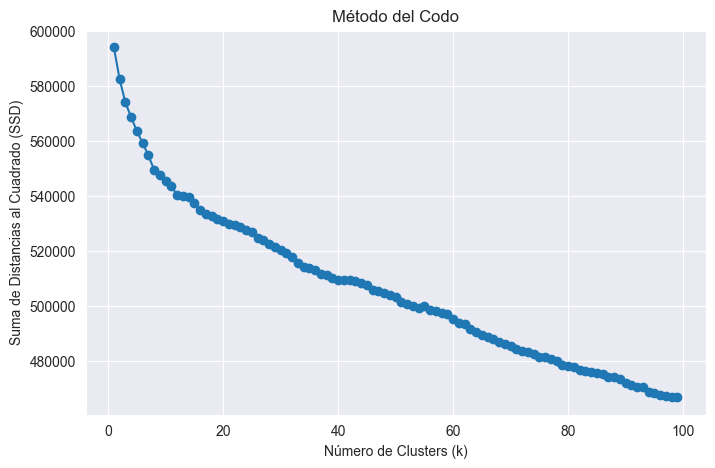

In [35]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar K-Means con los datos estandarizados
ssd = []
range_n_clusters = range(1, 100)
for k in range_n_clusters:
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

# Graficar el codo para determinar el número óptimo de clusters
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Distancias al Cuadrado (SSD)')
plt.show()